# EDA+시각화 정리

## 시각화

In [4]:
# 라이브러리 로딩
#notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해줌
%matplotlib inline    

#그래프 해상도를 높여줌
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import pandas as pd
import numpy as np

In [ ]:
# 저장
plt.savefig('lemon.png')

### Line chart

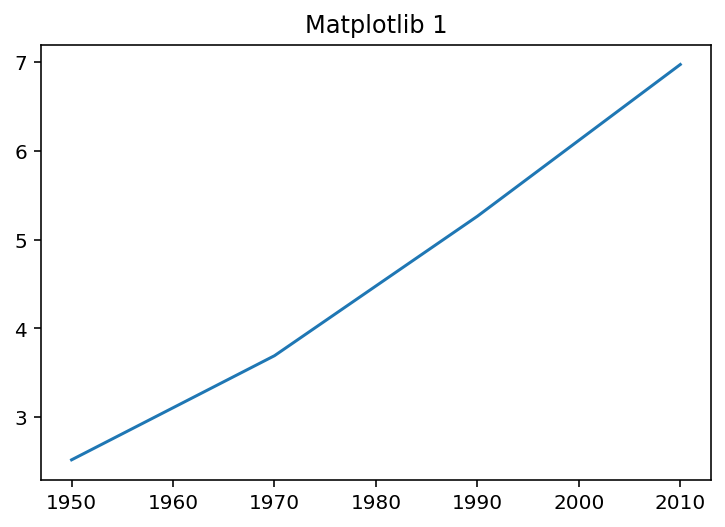

In [23]:
# Matplotlib 상태 기반 그래프
year = [1950, 1970, 1990, 2010] ; pop = [2.519, 3.692, 5.263, 6.972]
plt.plot(year, pop) # x축, y축
plt.title('Matplotlib 1')
plt.show()

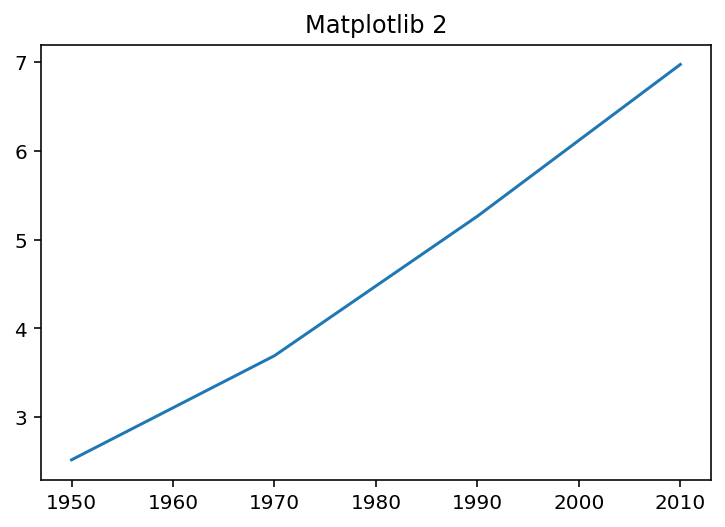

In [27]:
# Matplotlib 객체지향 그래프
year = [1950, 1970, 1990, 2010] ; pop = [2.519, 3.692, 5.263, 6.972]
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.set_title('Matplotlib 2')
ax.plot(year, pop)

Text(0.5, 1.0, 'Pandas')

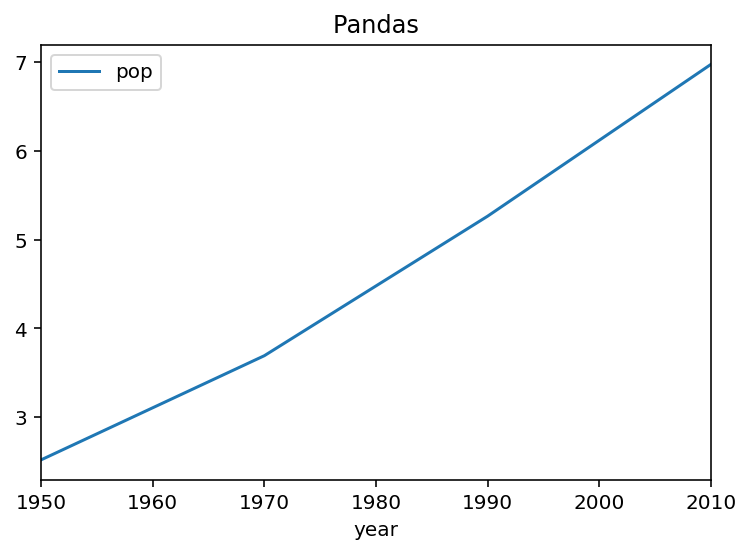

In [31]:
# Pandas 그래프
dic = dict(year = [1950, 1970, 1990, 2010], pop = [2.519, 3.692, 5.263, 6.972])
df = pd.DataFrame(dic)
df.plot(x = 'year', y = 'pop', kind='line')
plt.title('Pandas')

In [20]:
df

,year,pop
0,1950,2.519
1,1970,3.692
2,1990,5.263
3,2010,6.972


### Scatter plot

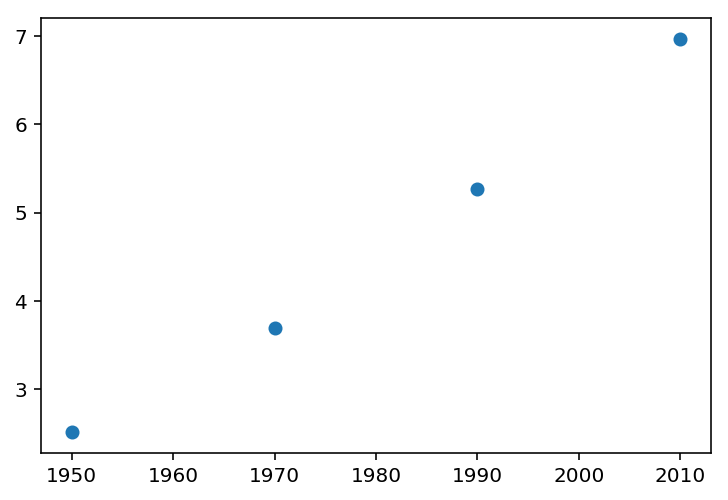

In [5]:
# Matplolib 상태 기반 방식
plt.scatter(year, pop) ; plt.show()

In [ ]:
# Pandas 방식
drinks.plot(kind='scatter', x='beer', y='wine', alpha=0.4) # 투명도 조정
drinks.plot(kind='scatter', x='beer', y='wine', c='spirit', colormap='Blues') 
# c에 따라 파랑 그라데이션

pd.scatter_matrix(drinks[['beer', 'spirit', 'wine']], figsize=(10, 8)) 
# 세 가지 변수의 교차 산점도 + 크기 조정

### Histogram

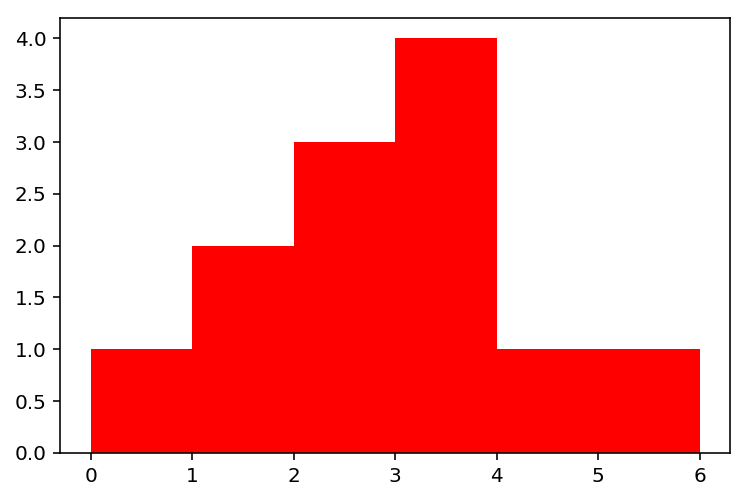

In [16]:
# Matplotlib 상태 기반 방식
values = [0,1.6,1.4,2.2,2.5,2.6,3.2,3.5,3,3.9,4.2,6]
plt.hist(values, bins = 6, color = 'red') ; plt.show()

In [ ]:
# Pandas 방식
df.hist(column='col1', by='col2', sharex=True, sharey = True, layout=(2, 3))

### Boxplot

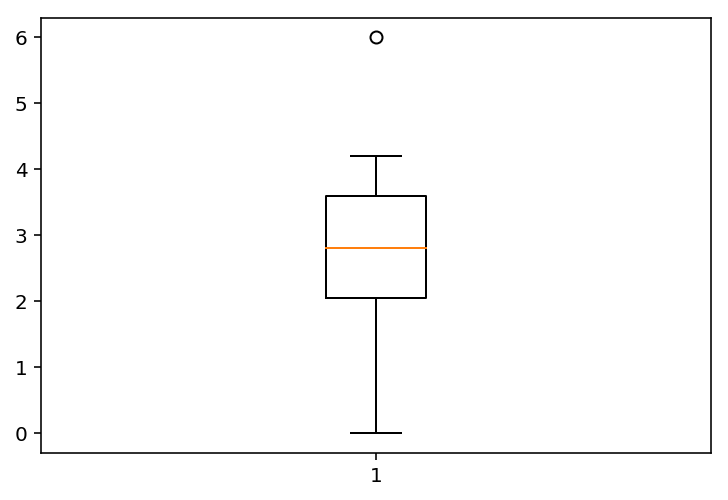

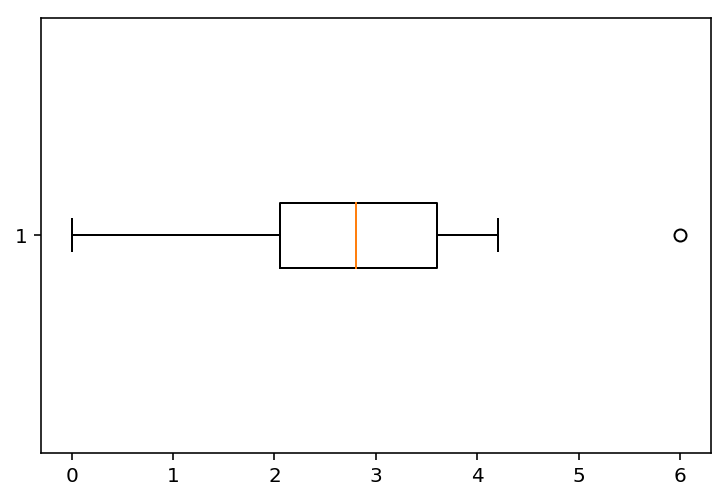

In [8]:
# Matplotlib 상태 기반 방식
values = [0,1.6,1.4,2.2,2.5,2.6,3.2,3.5,3,3.9,4.2,6]
plt.boxplot(values) ; plt.show() # 기본
plt.boxplot(values, vert = 0) ; plt.show() # 횡으로 방향 바꾸기

### Bar plot

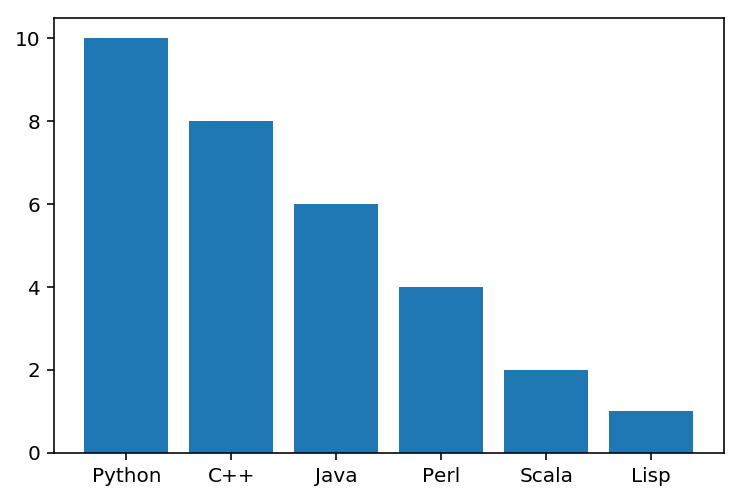

In [9]:
# Matplotlib 상태 기반 방식
objects = ['Python', 'C++', 'Java', 'Perl', 'Scala', 'Lisp']
performance = [10,8,6,4,2,1]
plt.bar(objects, performance) ; plt.show()

In [ ]:
# Pandas 방식
drinks.groupby('continent').mean().drop('liters', axis=1).plot(kind='bar') 
# 대륙별 bar plot
drinks.groupby('continent').mean().drop('liters', axis=1).plot(kind='bar', 
                                    stacked=True) # 위로 쌓아올리는 방식

### Pie chart

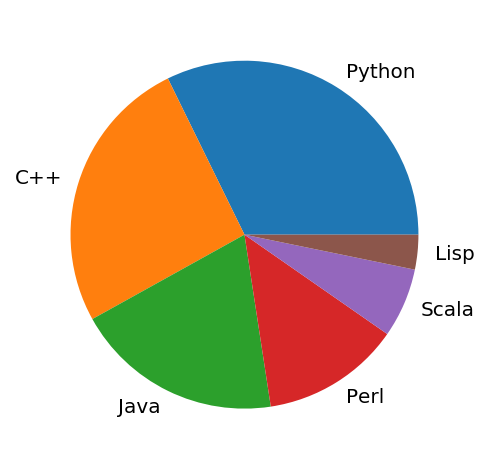

In [10]:
plt.pie(performance, labels =objects) ; plt.show()

## Customize
### Axis, Title

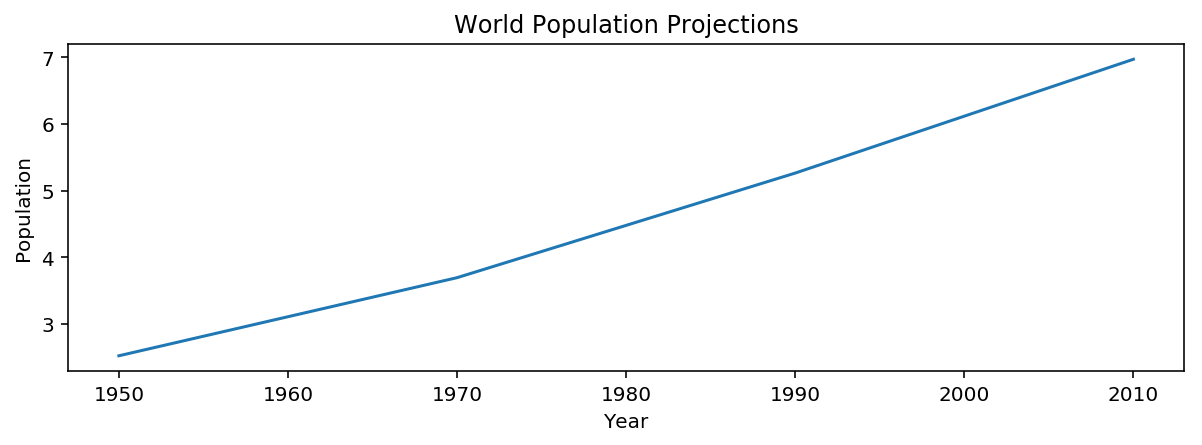

In [94]:
year = [1950, 1970, 1990, 2010] ; pop = [2.519, 3.692, 5.263, 6.972]
plt.figure(figsize=(10,3)) # 그래프 크기 미리 지정
plt.plot(year, pop)

# label
plt.xlabel('Year')
plt.ylabel('Population')

# Title
plt.title('World Population Projections') ; plt.show()

### ticks

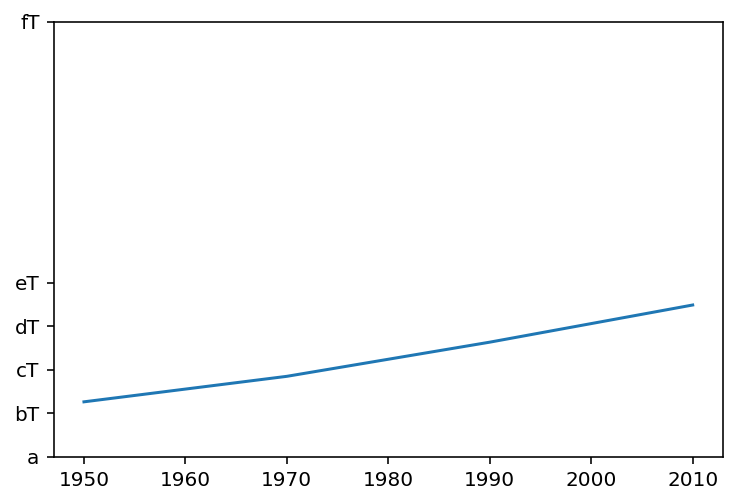

In [15]:
plt.plot(year, pop)
# Ticks
plt.yticks([0, 2, 4, 6, 8, 20], ['a', 'bT', 'cT', 'dT', 'eT', 'fT'])          ; plt.show()

### Common Axis

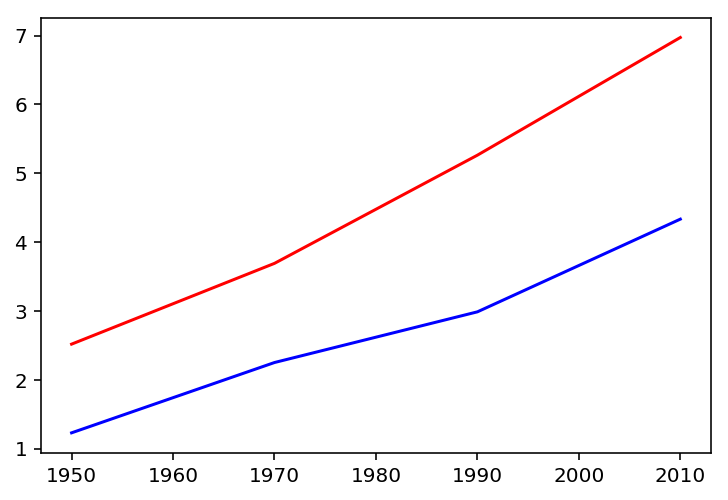

In [18]:
year = [1950, 1970, 1990, 2010]
pop1 = [2.519, 3.692, 5.263, 6.972]
pop2 = [1.231, 2.252, 2.988, 4.334]

plt.plot(year, pop1, 'red')
plt.plot(year, pop2, 'blue') ; plt.show()

## Pandas 방식

In [33]:
import pandas as pd
aq = pd.read_csv('data/airquality.csv') ;
ti = pd.read_csv('data/titanic_simple.csv')

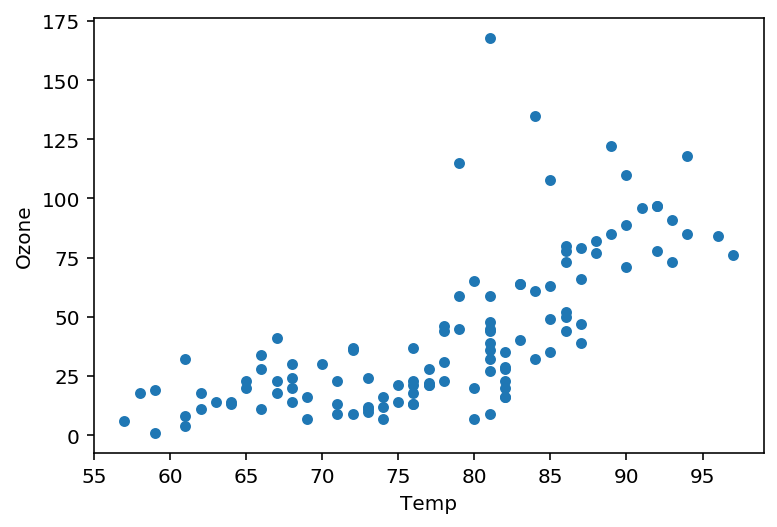

In [34]:
aq.plot(kind = "scatter",  x= "Temp", y = "Ozone")

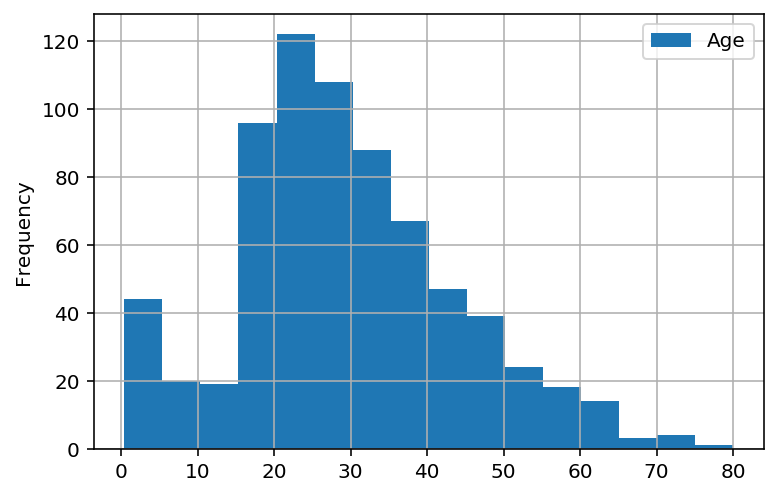

In [35]:
ti.plot(kind = 'hist', y= "Age", bins = 16, grid = 1)

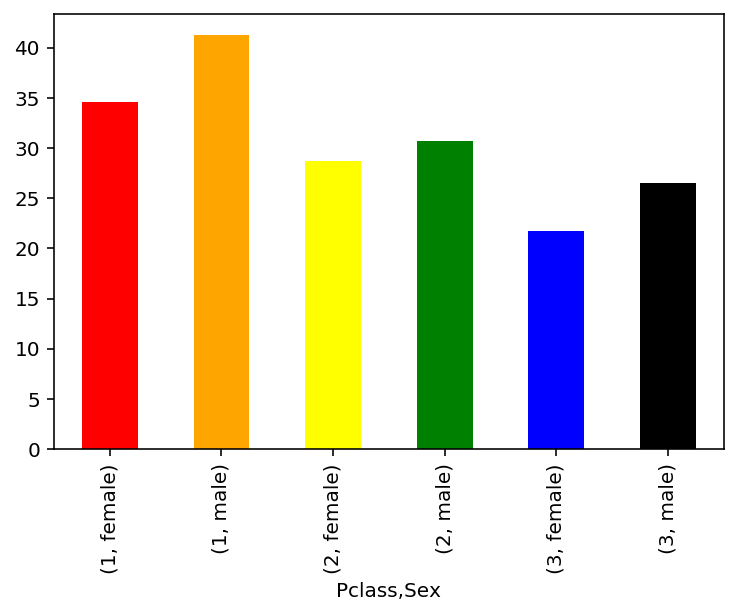

In [41]:
ti_grouped = ti.groupby(["Pclass","Sex"])["Age"].mean()
ti_grouped.plot(kind = "bar", color = ['red','orange', 'yellow','green','blue','black']) ; 

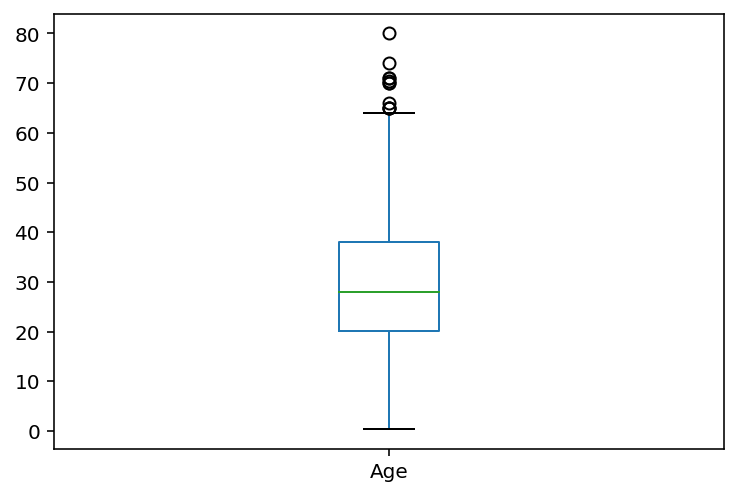

In [42]:
ti.plot(kind = "box", y ="Age")

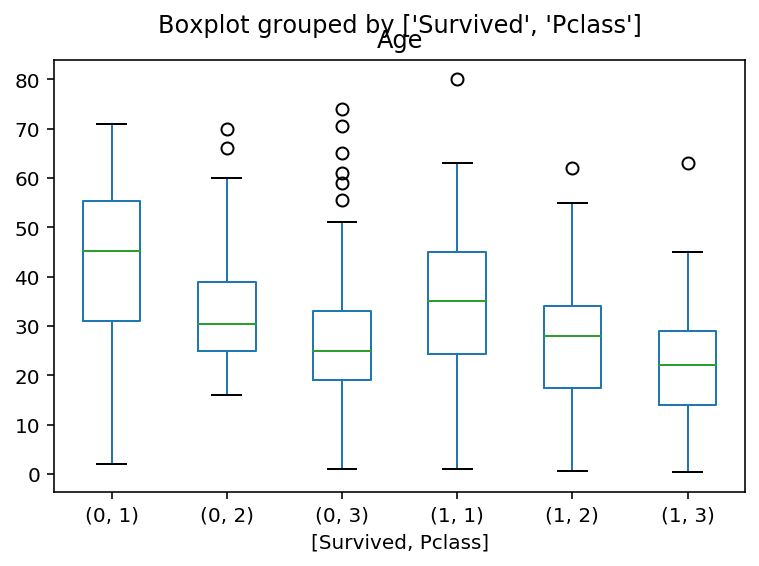

In [44]:
ti.boxplot("Age", by =["Survived","Pclass"], grid=False)

## Seaborn

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Density plot

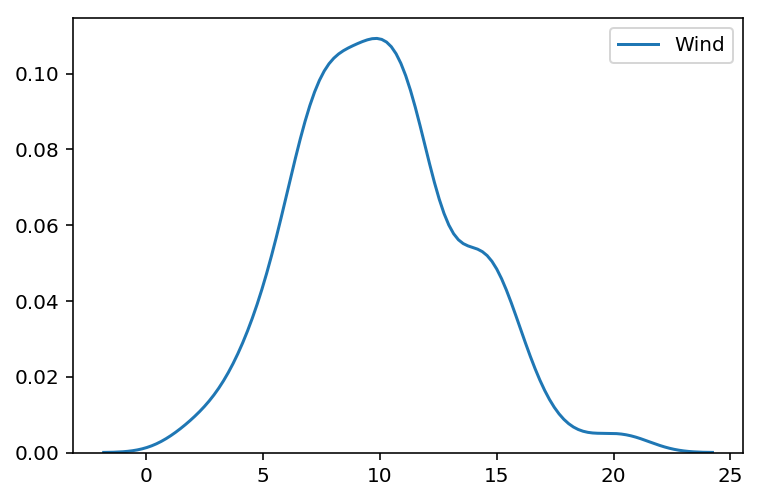

In [36]:
# Density plot만 그리기 위한 .kdeplot()
sns.kdeplot(aq["Wind"]) ; plt.show()

### Distplot

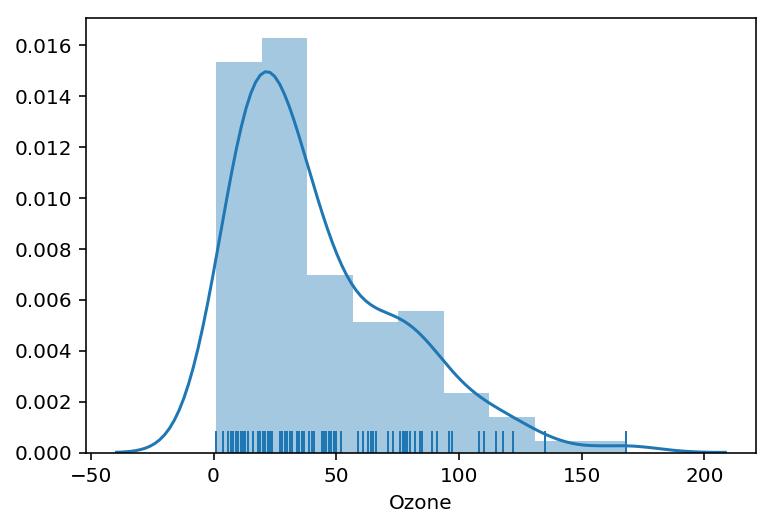

In [39]:
# distplot으로 densityplot과 histogram 함께 그리기
sns.distplot(aq[aq["Ozone"].notnull()]['Ozone'], rug = True) ; 
plt.show()

### barplot

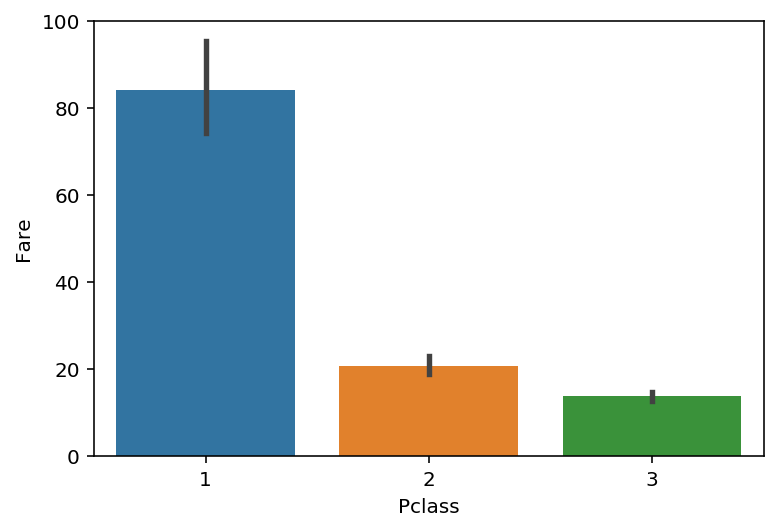

In [52]:
sns.barplot(x = 'Pclass', y = 'Fare', data = ti) # y의 평균값 자동으로 계산해 줌

### countplot

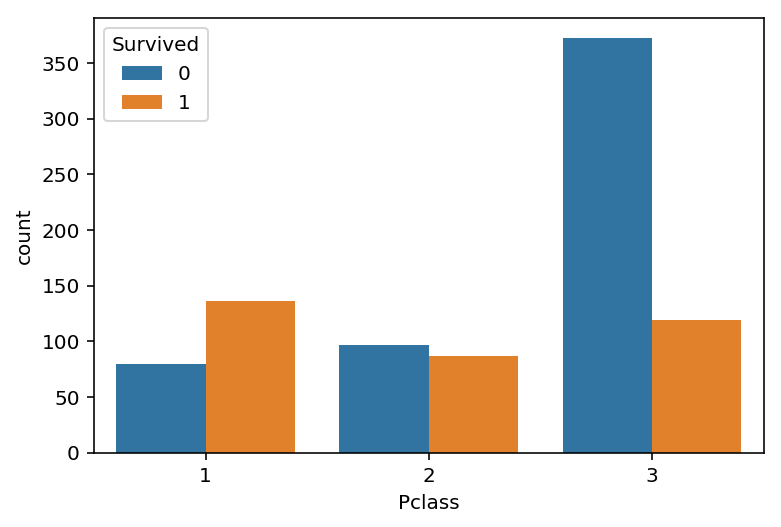

In [42]:
sns.countplot(x="Pclass", data=ti, hue = "Survived");plt.show()

### boxplot

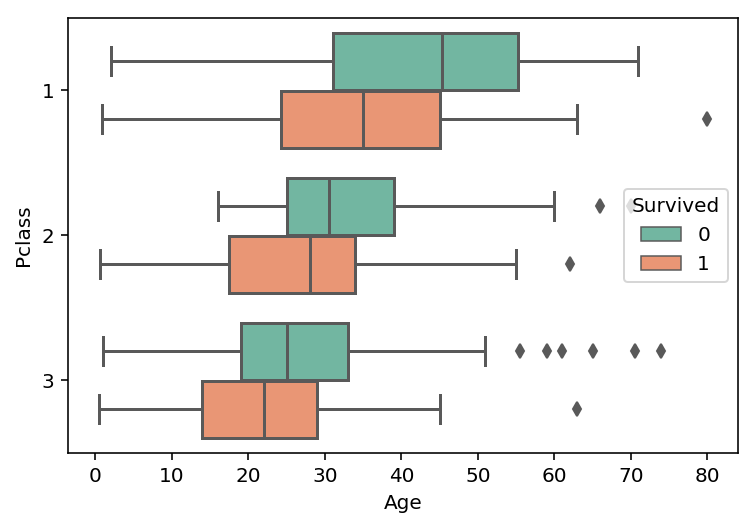

In [45]:
sns.boxplot(y="Pclass", x="Age", hue="Survived", data=ti,
            orient = 'h', palette = "Set2");
plt.show()

### scatter plot

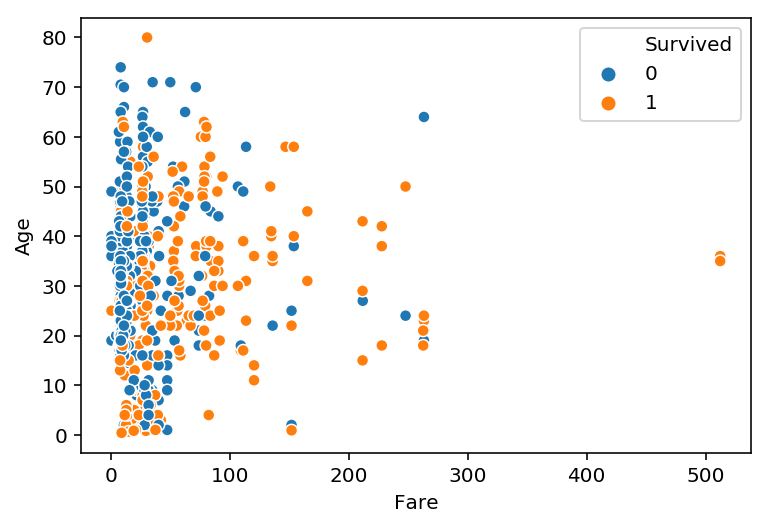

In [47]:
sns.scatterplot(x="Fare", y="Age", hue="Survived", data=ti);
plt.show()

### 기타

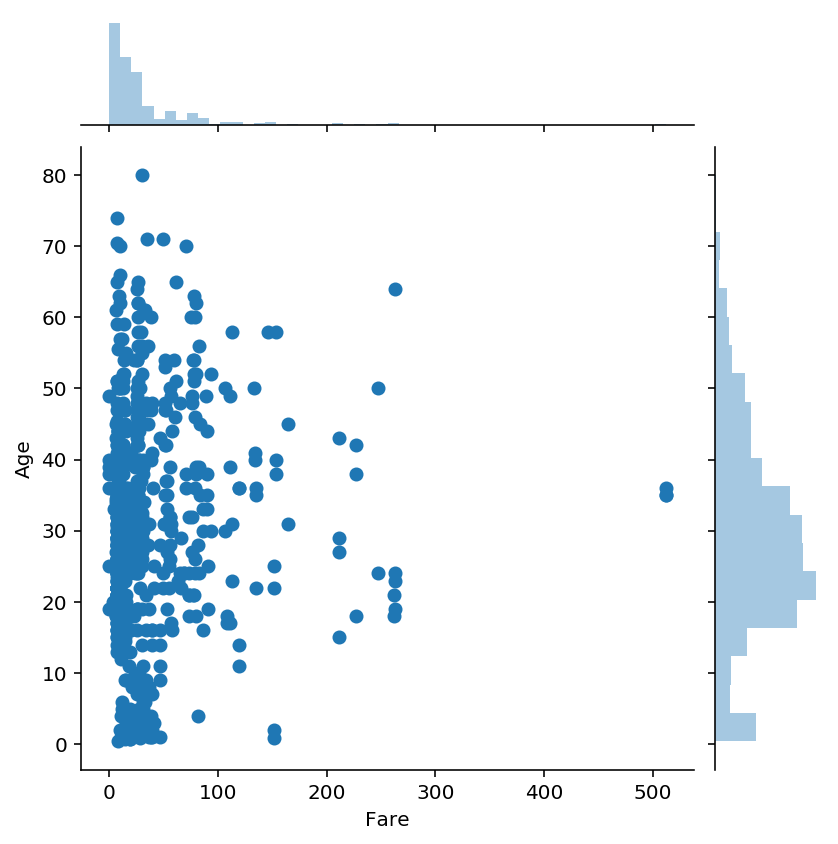

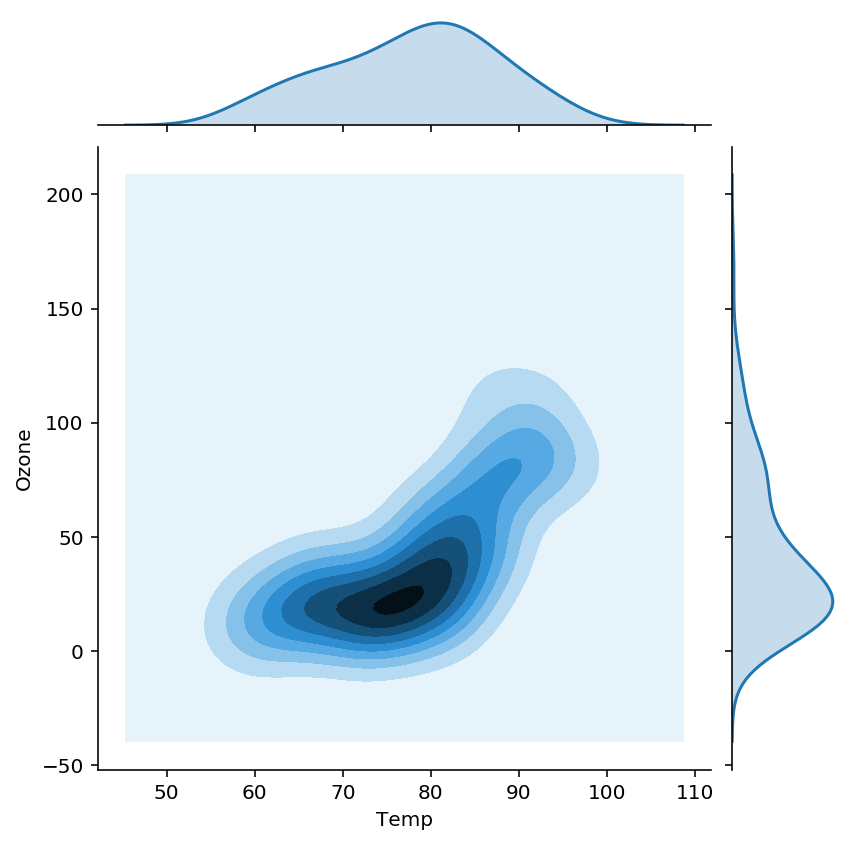

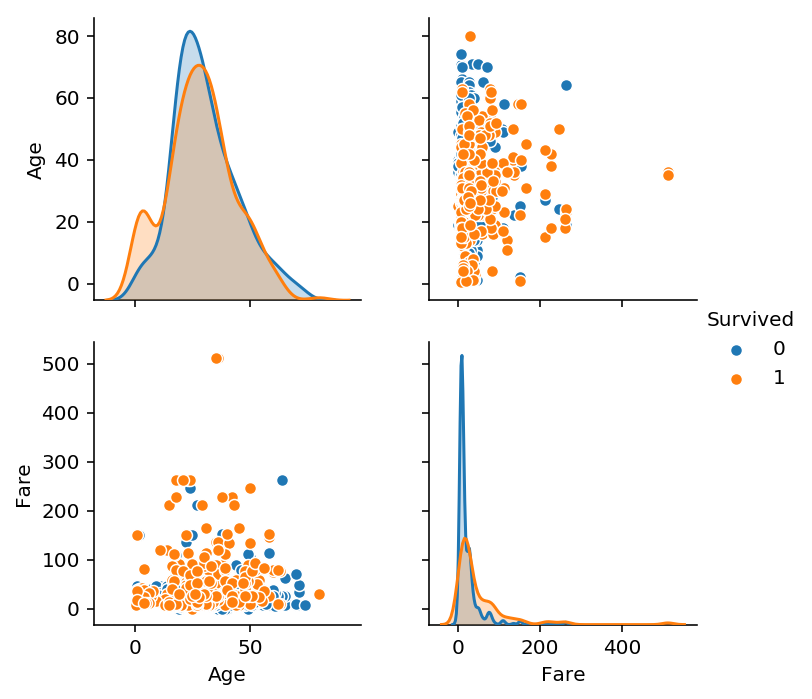

In [53]:
sns.jointplot(x="Fare", y="Age", data=ti)
sns.jointplot(x="Temp", y="Ozone", data=aq, kind = 'kde')
# pairplot는 NaN값을 사용할 수 없기 때문에 사전 제거
ti2 = ti[ti['Age'].notnull()]
sns.pairplot(ti2, vars = ['Age','Fare'], hue = "Survived") ; 
plt.show()

## EDA

In [ ]:
# 기본 EDA
df.shape
df.head()
df.tail()
df.describe()
df.dtypes
df['Date'] = pd.to_datetime(df['Date'])

Location  Price
Beach     0.25     12
          0.35      2
          0.50      3
Park      0.25      3
          0.35      4
          0.50      8
Name: Location, dtype: int64


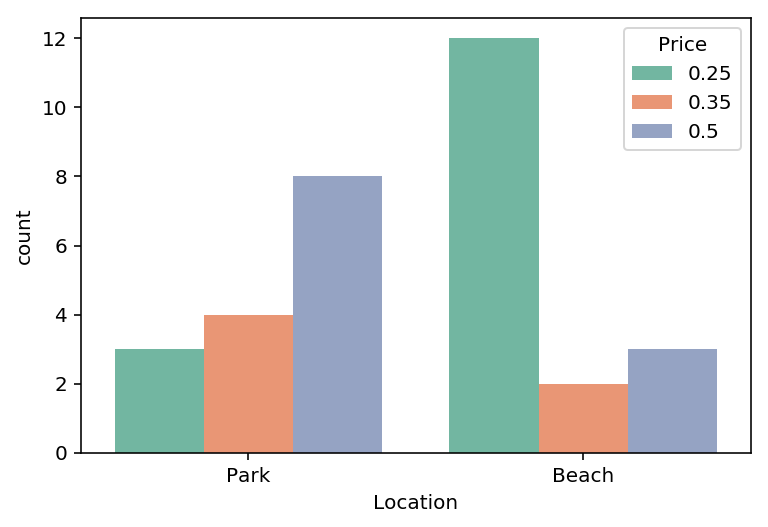

In [89]:
# 변수별 집계 및 시각화
print(df.groupby(['Location', 'Price'])['Location'].count())
sns.countplot(data = df, x = 'Location', hue = 'Price', palette='Set2') ; 
plt.show()